# Regresion lineal: Costo de un incidente de seguridad
En este ejercicio se explican los fundamentos basicos de la regresion lineal, aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se han visto afectados.El conjunto de datos es generado de manera aleatoria

# 1.- Generacion del DataSet.

In [1]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100,1)

print("La longitud del cDataSet de datos es : ", len(X))

La longitud del cDataSet de datos es :  100


# 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

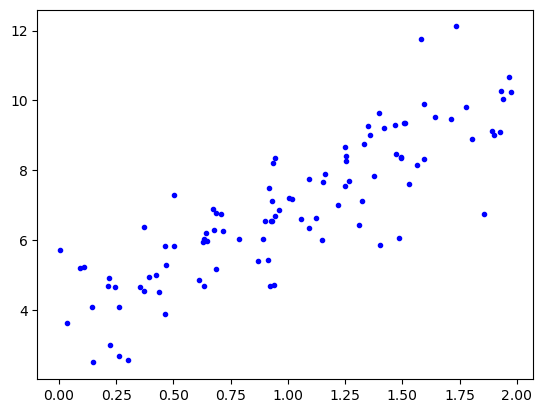

In [3]:
plt.plot(X, Y, "b.")
plt.show()

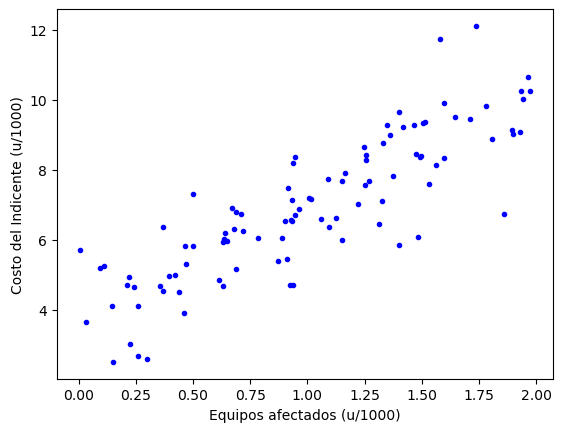

In [4]:
plt.plot(X, Y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Indicente (u/1000)")
plt.show()

# Modificaciones del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_afectados': X.flatten(),'Costo':Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_afectados,Costo
0,0.110158,5.245736
1,0.612870,4.858387
2,0.785394,6.043584
3,1.325243,7.121906
4,0.464081,5.832025
5,0.300450,2.589625
6,1.090833,7.745186
7,0.213783,4.697922
8,1.474593,8.462947
9,0.945239,8.366222


In [7]:
# Escalado del numero de equipos afectados
df ['No_Equipos_afectados'] = df ['No_Equipos_afectados'] * 1000
df ['No_Equipos_afectados'] = df ['No_Equipos_afectados'].astype('int')
# Escalado del costo
df ['Costo'] = df ['Costo'] * 10000
df['Costo'] = df ['Costo'].astype('int')
df.head(10)

,No_Equipos_afectados,Costo
0,110,52457
1,612,48583
2,785,60435
3,1325,71219
4,464,58320
5,300,25896
6,1090,77451
7,213,46979
8,1474,84629
9,945,83662


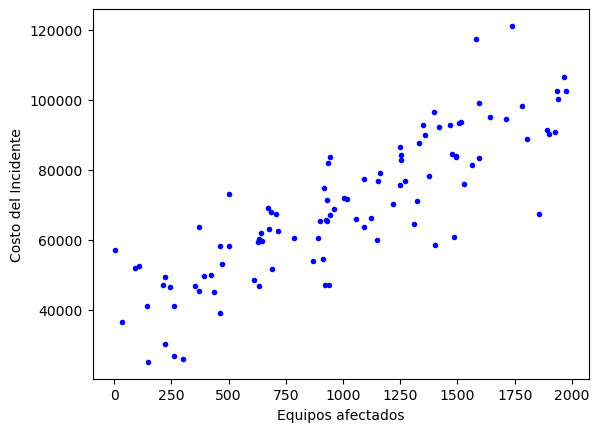

In [11]:
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b." )
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 4.- Construccion del modelo


In [13]:
from sklearn.linear_model import LinearRegression

In [17]:
# Construccion del modelo y ajuste de la funcion de hipotesiis
lin_reg=LinearRegression()
lin_reg.fit(df['No_Equipos_afectados'].values.reshape(-1, 1),df['Costo'].values)


LinearRegression()

In [18]:
# Parametro Tetha 0
lin_reg.intercept_

36977.527394204764

In [19]:
# Parametro Tetha 1
lin_reg.coef_

array([32.23249971])

In [24]:
# Prediccion para el valor minimo y maximo del conjunto de datos de entrenamiento 
X_min_max = np.array([[df['No_Equipos_afectados'].min()],[df['No_Equipos_afectados'].max()]])
y_train_pred=lin_reg.predict(X_min_max)

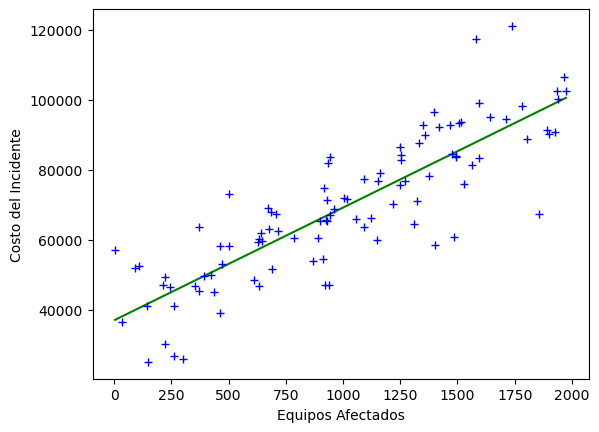

In [29]:
# Reprecentacion grafica de la funcion de hipotesis generada
plt.plot(X_min_max,y_train_pred,"g-")
plt.plot(df['No_Equipos_afectados'],df['Costo'],"b+")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Prediccion de nuevos ejemplos 

In [36]:
x_new = np.array([[2500]]) # Numero de Equipos afectados.
# Predicion del costo que tendria el incidente 
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $",int(Costo[0]))

El costo del incidente seria: $ 117558


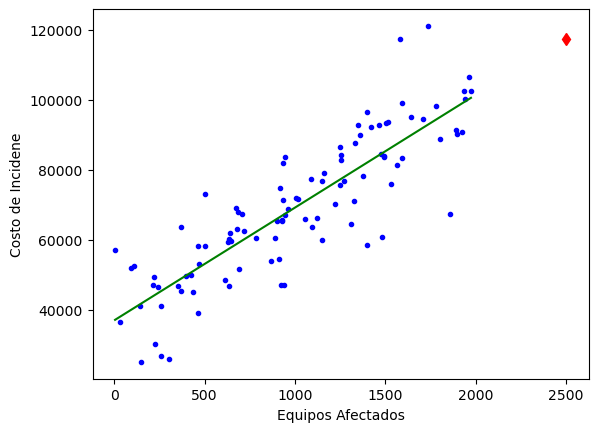

In [37]:
plt.plot(df['No_Equipos_afectados'],df['Costo'],"b.")
plt.plot(X_min_max,y_train_pred,"g-")
plt.plot(x_new,Costo,"rd")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo de Incidene")
plt.show()